In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np


# Tree inventory
data = pd.read_csv('data/tree_inventory.csv')
tree_inventory = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data["X"], data["Y"]), crs="EPSG:4326")
tree_inventory = tree_inventory.to_crs(3857)
tree_inventory["X"] = tree_inventory.geometry.x
tree_inventory["Y"] = tree_inventory.geometry.y
tree_inventory = tree_inventory.dropna()

In [3]:
import fastfuels_core
from tqdm import tqdm
import shapely
# Create a Tree Population object to represent the tree inventory and for easy access to tree data
tree_population = fastfuels_core.TreePopulation(tree_inventory)

hs = []
rs = []
# Populate the synthetic CHM with tree heights
for tree in tqdm(tree_population):
    if tree.status_code != 1:
        continue
    #crown_radius = tree.max_crown_radius
    hs.append(tree.height)
    rs.append(tree.crown_base_height)
    

 

100%|██████████| 37096/37096 [00:02<00:00, 13346.58it/s]


(0.0, 30.0)

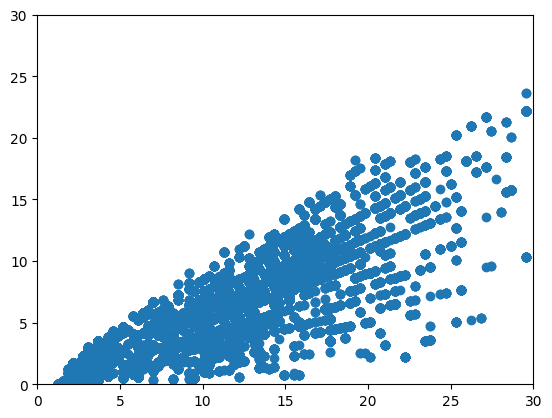

In [6]:
import matplotlib.pyplot as plt
plt.scatter(hs, rs)
plt.xlim([0,30])
plt.ylim([0,30])

plt.plot(hs, hs)

(array([1.100e+02, 3.370e+02, 6.060e+02, 1.653e+03, 1.423e+03, 1.363e+03,
        2.452e+03, 5.970e+02, 3.500e+02, 3.019e+03, 1.040e+02, 6.160e+02,
        1.177e+03, 2.770e+02, 1.011e+03, 1.084e+03, 4.100e+02, 3.950e+02,
        8.930e+02, 7.860e+02, 5.030e+02, 1.897e+03, 5.270e+02, 2.190e+02,
        7.960e+02, 5.740e+02, 2.890e+02, 6.600e+02, 4.760e+02, 4.400e+02,
        7.860e+02, 3.120e+02, 3.800e+02, 1.084e+03, 3.920e+02, 4.860e+02,
        9.440e+02, 3.680e+02, 2.830e+02, 1.070e+03, 6.000e+02, 2.160e+02,
        6.570e+02, 3.330e+02, 3.900e+02, 3.420e+02, 2.840e+02, 3.110e+02,
        5.030e+02, 1.770e+02, 2.010e+02, 3.290e+02, 9.100e+01, 1.050e+02,
        3.240e+02, 7.500e+01, 2.100e+01, 9.500e+01, 3.900e+01, 8.300e+01,
        1.510e+02, 1.400e+01, 3.000e+01, 4.700e+01, 7.000e+00, 1.000e+00,
        4.900e+01, 8.600e+01, 0.000e+00, 1.020e+02, 0.000e+00, 0.000e+00,
        2.000e+00, 1.220e+02, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        6.900e+01, 7.400e+01, 2.000e+0

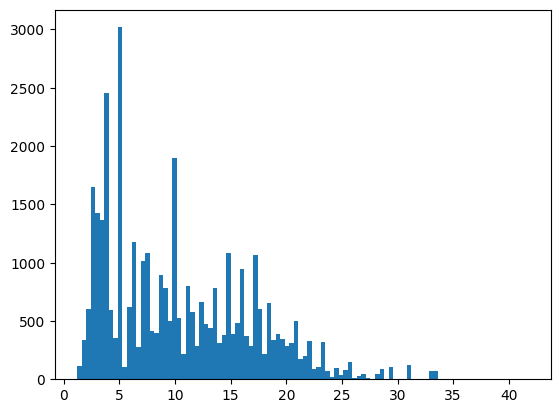

In [10]:
plt.hist(hs, bins=100)

In [12]:
min(hs)

1.2192

In [13]:
tree_inventory

,Unnamed: 0,TREE_ID,PLOT_ID,SPCD,STATUSCD,DIA,HT,CR,X,Y,geometry
0,0,1076395,37888,122,1,10.414,4.2672,0.50,-1.270218e+07,5.913871e+06,POINT (-12702180.268 5913870.799)
1,1,1076393,37888,122,1,15.240,6.4008,0.50,-1.270218e+07,5.913865e+06,POINT (-12702179.395 5913865.227)
2,2,1076382,37888,122,1,33.020,10.9728,0.60,-1.270216e+07,5.913829e+06,POINT (-12702159.906 5913828.718)
3,3,1076387,37888,122,1,34.036,13.4112,0.70,-1.270217e+07,5.913694e+06,POINT (-12702171.038 5913694.448)
4,4,1076384,37888,122,1,17.526,8.5344,0.20,-1.270219e+07,5.913812e+06,POINT (-12702185.053 5913812.389)
...,...,...,...,...,...,...,...,...,...,...,...
41387,41446,1901053,75961,122,1,18.034,9.1440,0.80,-1.270148e+07,5.914456e+06,POINT (-12701482.994 5914455.517)
41388,41447,1901056,75961,122,1,3.048,2.1336,0.20,-1.270219e+07,5.913934e+06,POINT (-12702186.638 5913934.322)
41389,41448,1901056,75961,122,1,3.048,2.1336,0.20,-1.270191e+07,5.914495e+06,POINT (-12701914.218 5914494.971)
41390,41449,1901051,75961,122,1,30.988,12.1920,0.85,-1.270211e+07,5.913971e+06,POINT (-12702109.392 5913970.743)


In [25]:
for tree in tree_population:
    profile_model = tree.crown_profile_model
    break

In [27]:
profile_model.b

1.4627

In [37]:
z = np.linspace(0.,5.,50)
r = profile_model.get_radius_at_height(z)

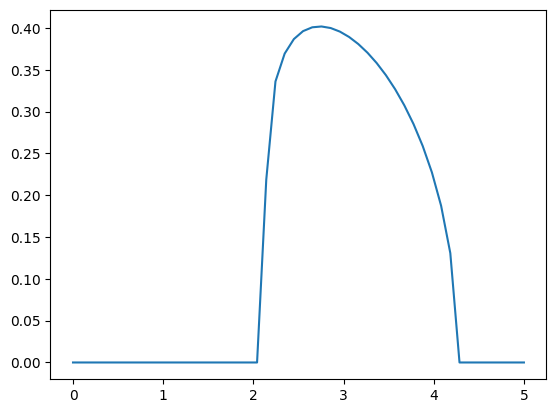

In [38]:
plt.plot(z, r)